<a href="https://colab.research.google.com/github/nencyfaganiya/Salary-Prediction/blob/main/salary_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
### Features should be an array of shape(no.of samples,no.of features)
### Target should be an array of shape either (no.of samples,no.of target) or (no.of sample,)

In [ ]:
### Divide the data into features and target
x = np.array(data.iloc[:][["YearsExperience"]])
#x = np.array(data.iloc[:,0])    ### years of experience
#x = x.reshape(len(x),1)

In [ ]:
y = np.array(data.iloc[:,1])        ### salary
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
### Split the data into training and testing
x_new = x[0:10]         ## take 10 data for test
y_new = y[0:10]
x_new
y_new

array([39343., 46205., 37731., 43525., 39891., 56642., 60150., 54445.,
       64445., 57189.])

In [ ]:
from sklearn.model_selection import train_test_split
a,b,c,d = train_test_split(x_new,y_new,train_size=0.70,random_state=1)

In [ ]:
a  ## 70% of x
b  ## 30% of x
c  ## 70% of y
d  ## 30% of y

array([37731., 57189., 60150.])

In [ ]:
### split traing and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=4697)

In [ ]:
ytest

array([46205., 39343., 61111., 57189., 98273., 93940.])

In [ ]:
### Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
### Perform the training
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Test the model (Prediction)
ypred = model.predict(xtest)
ypred

array([ 44788.50460346, 107700.91806713, 100188.98810131,  81409.16318679,
       122724.77799875,  89860.08439832])

In [ ]:
xtest
ytest

array([83088., 98273., 63218., 93940., 61111., 91738.])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2                    #### model is  76.16% accurate at random_state=1

0.9974925617006956

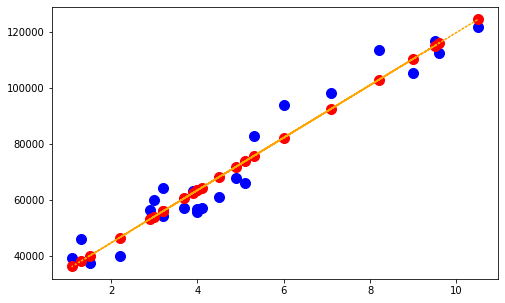

In [ ]:
### Plot the line of regression (Training Samples)
plt.figure(figsize=(8,5))
plt.scatter(xtrain,ytrain,color='blue',s=100,label="Actual Point")
plt.scatter(xtrain,model.predict(xtrain),color='red',s=100,label="Predicted Point")
plt.plot(xtrain,model.predict(xtrain), linestyle='dotted', color='orange',label="Line of regression Point")
plt.show()

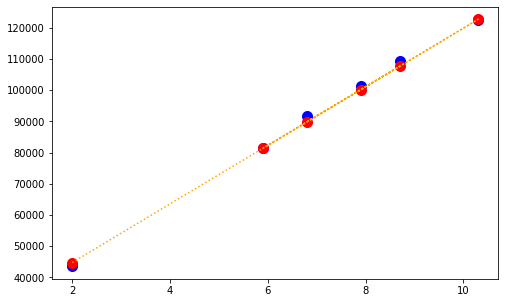

In [ ]:
### Plot the line of regression (Testing Samples)
plt.figure(figsize=(8,5))
plt.scatter(xtest,ytest,color='blue',s=100,label="Actual Point")
plt.scatter(xtest,model.predict(xtest),color='red',s=100,label="Predicted Point")
plt.plot(xtest,model.predict(xtest),linestyle='dotted',color='orange',label="Line of Regression")
plt.show()

In [ ]:
scores = []
for i in range(5000):
  xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=0.80,random_state=i)
  model1 = LinearRegression()
  model1.fit(xtrain1,ytrain1)
  ypred1 = model1.predict(xtest1)
  scores.append(r2_score(ytest1,ypred1))

In [ ]:
np.max(scores)    ## maximum accuracy

0.9974925617006956

In [ ]:
np.argmax(scores)     ## random_state value

4697

In [ ]:
model.predict([[15]])       ## start using the machine

array([166857.36654789])

In [ ]:
years = float(input("Enter experience in years "))
salary = model.predict([[years]])
print("The salary is Rs "+str(salary[0]))

Enter experience in years 11
The salary is Rs 129297.71671883277


In [ ]:
print("The salary is Rs",str(salary[0]))

The salary is Rs 129297.71671883277
